# Diabetes Prediction using SVM Classifier.


### Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [6]:
import os
df = pd.read_csv('D:\Congnizance_2020\Mentor_Task\Datasets\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
X_data = df.drop(columns='Outcome', axis=1)
Y_data = df['Outcome']

In [23]:
print("The dimensions for features is : ", X_data.shape)
print("Dimensions of output labels : ", Y_data.shape)

The dimensions for features is :  (768, 8)
Dimensions of output labels :  (768,)


### Standardizing the data

In [18]:
scalar = StandardScaler()
X_data = scalar.fit_transform(X_data)
print(X_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


### Spliting the data into train and test dataset

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, shuffle=True)

### Reducing the dimensions using PCA

In [25]:
pca = PCA(n_components=2)
pca.fit(X_train)
x_pca_train = pca.transform(X_train)

### Data visualization 

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

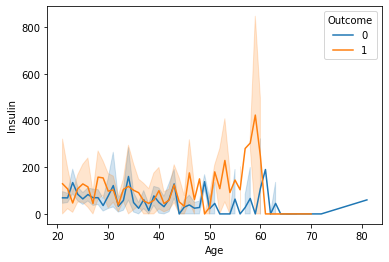

In [43]:
sns.lineplot(data=df, x="Age", y="Insulin", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

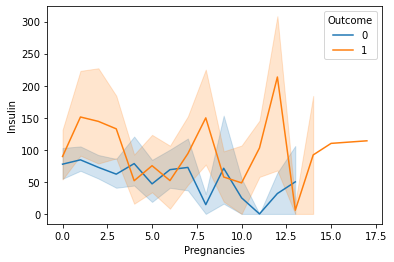

In [44]:
sns.lineplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")

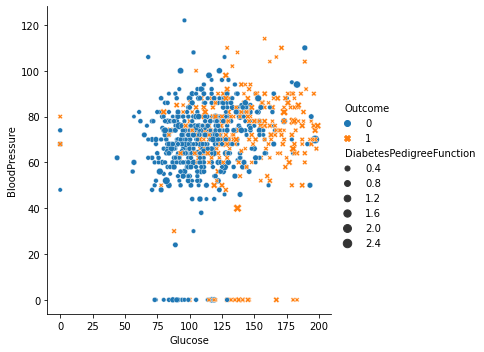

In [22]:
sns.relplot(
    data=df, 
    x="Glucose", y="BloodPressure",
    hue="Outcome", style="Outcome", size="DiabetesPedigreeFunction")

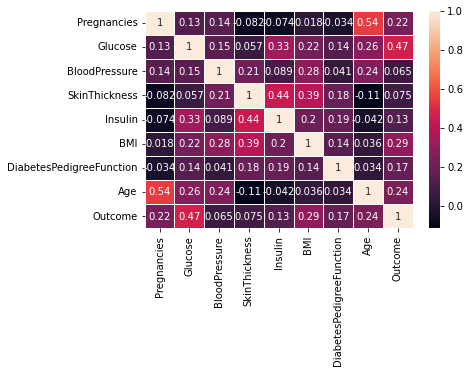

In [42]:
data = df.corr()
sns.heatmap(data, annot=True, linewidth=0.5)
plot.set(xlabel="", ylabel="")
plot.xaxis.tick_top()

<AxesSubplot:>

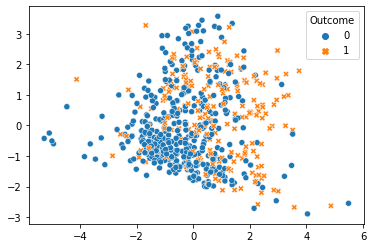

In [30]:
sns.scatterplot(x=x_pca_train[:,0], y=x_pca_train[:,1], hue=y_train, style=y_train)

### Model Training

In [54]:
linear_scv = SVC(kernel='linear', C=1.0)
linear_scv.fit(X_train, y_train)
y_pred_test = linear_scv.predict(X_test)
print("Model Accuracy : ", 100*(accuracy_score(y_test, y_pred_test)))

Model Accuracy :  77.92207792207793


### Model Evaluation

In [55]:
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[96 10]
 [24 24]]

True Positives(TP) =  96

True Negatives(TN) =  24

False Positives(FP) =  10

False Negatives(FN) =  24


<AxesSubplot:>

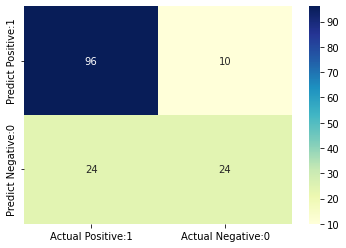

In [57]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Making a Prediction Model

In [64]:
input = np.array([8, 125, 92, 0, 0, 0, 0.232, 54])
input = input.reshape(1,-1)
prediction = linear_scv.predict(input)
if prediction == 1:
    print("The person has diabetes")
else:
    print("The person doesn't have diabetes")

The person has diabetes
